### Define imports

In [347]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
plt.rcParams["figure.figsize"] = (4, 4)
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

### Define plotting functions

In [336]:
def plim(img):
    plt.imshow(img[:,:,::-1].astype(np.uint8), interpolation='none')

def plim_g(img):
    plt.imshow(img, cmap="gray", interpolation='none')

### Load MNIST dataset

In [337]:
d = read_data_sets("./", one_hot=False)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


### Choose the image of a digit to work with

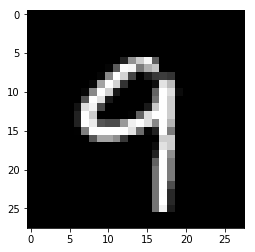

In [339]:
idx = 8
img = np.reshape(d.train.images[idx], (28, 28))
plim_g(img)

It is not exactly the same 9 as in the book, but close enough

### Translate vertically to a starting position

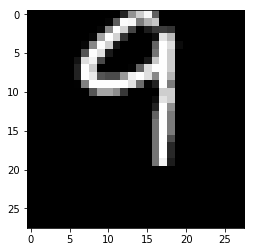

In [340]:
r = np.zeros((28, 28))
r[:28-6] = img[6:]
plim_g(r)

### Create a set of images X, obtained by a downward translation 1 pixel at a time
Each row of X contains the coordinates of an image in some orthonormal basis

In [96]:
n = 20
X = np.zeros((n, 784))
X[0] = r.reshape(-1)

for i in range(n - 1):
    r[1:] = r[0:27]
    r[0] = 0
    X[i + 1] = r.reshape(-1)
    

### Display the resulting set

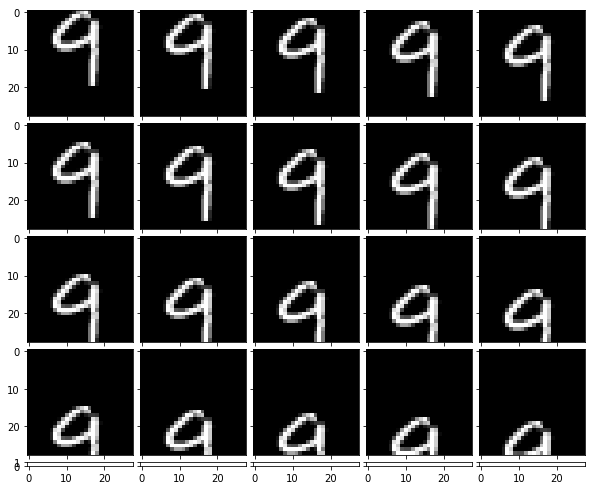

In [99]:
fig = plt.figure(1, (10., 10.))
k = np.ceil(np.sqrt(n)).astype(int)
grid = ImageGrid(fig, 111,
                 nrows_ncols=(k, k),
                 axes_pad=0.1)

for i in range(n):
    grid[i].imshow(X[i].reshape(28, 28), cmap="gray")

### Use PCA to project points from X onto a 2D space
The shape of X will change from [n, 784] to [n, 2]

In [273]:
# normalize data
Xnorm = X - np.mean(X, axis=0)
# Now we could calculate a sample covariance matrix as
# Sx = np.dot(Xnorm.T, Xnorm) / (Xnorm.shape[0] - 1)
# for unbiased estimate or ignore subtraction of 1 and simply do
# Sx = np.dot(Xnorm.T, Xnorm) / Xnorm.shape[0]
# The latter is easier from a computational point of view, 
# because we can use a fast SVD instead of a slow numpy eigenvalue decomposition np.linalg.eig

U, S, V = np.linalg.svd(Xnorm)
# returned V here is actually a V.T, 
# rows of V are eigenvectors of Xnorm.T * X


In [344]:
print("The first seven largest singular values", S[:7])
# Two largest singular values are of interest
print("The first maximum singular value", S[0])
print("The second maximum singular value", S[1])

('The first seven largest singular values', array([ 13.44979553,   9.24751861,   8.07277752,   7.88310738,
         7.25618232,   7.00486526,   5.59828879]))
('The first maximum singular value', 13.449795530222909)
('The second maximum singular value', 9.2475186118727013)


In [345]:
# keep only two eigenvectors corresponding to the two largest singular values
v2 = V[[0, 1], :]
print(v2.shape)

(2, 784)


In [313]:
# Project normalized data onto a 2D space spanned by those two eigenvectors
X2d = np.dot(Xnorm, v2.T)
print(X2d.shape)

(20, 2)


In [430]:
# approximate a derivative in one of the points (point number 7 is chosen)
diff = (X[6] - X[8]) / 2
img_diff = diff.reshape((28, 28))
# project a derivative vector onto the 2D space
diff2d = np.dot(diff, v2.T)

### Plot the resulting manifold

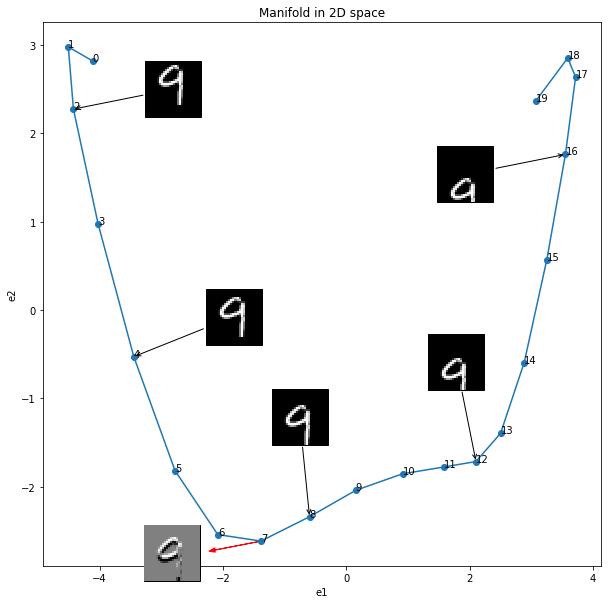

In [434]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(X2d[:, 0], X2d[:, 1], marker='.', markersize='12')
ax.set_xlabel("e1")
ax.set_ylabel("e2")
ax.set_title("Manifold in 2D space")
for i in range(n):
    ax.annotate('%s' % i, xy=(X2d[i, 0], X2d[i, 1]), textcoords='data')
    
for i, offset in zip([2, 4, 8, 12, 16], [(100, 20), (100, 40), (-10, 100), (-20, 100), (-100, -20)]):
    im = OffsetImage(X[i, :].reshape((28, 28)), zoom=2, cmap="gray")
    im.image.axes = ax

    ab = AnnotationBbox(im, (X2d[i, 0], X2d[i, 1]),
                        xybox=offset,
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0,
                        arrowprops=dict(arrowstyle="->"))

    ax.add_artist(ab)

# add the tangent vector 
ax.arrow(X2d[7, 0], X2d[7, 1], diff2d[0], diff2d[1], head_width=0.05, head_length=0.1, color='red')

# add the derivative image
if 1:
    im = OffsetImage(img_diff, zoom=2, cmap="gray")
    im.image.axes = ax

    ab = AnnotationBbox(im, (X2d[7, 0], X2d[7, 1]),
                        xybox=diff2d * 120,
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0)

    ax.add_artist(ab)